# 1A. Compute Climatologies

This notebook introduces PCDMI mean climate driver.

**Reference**

* Gleckler, P. J., Taylor, K. E., and Doutriaux, C.: Performance metrics for climate models, J. Geophys. Res., 113, D06104, https://doi.org/10.1029/2007jd008972, 2008. 

* Lee, J., Gleckler, P. J., Ahn, M.-S., Ordonez, A., Ullrich, P. A., Sperber, K. R., Taylor, K. E., Planton, Y. Y., Guilyardi, E., Durack, P., Bonfils, C., Zelinka, M. D., Chao, L.-W., Dong, B., Doutriaux, C., Zhang, C., Vo, T., Boutte, J., Wehner, M. F., Pendergrass, A. G., Kim, D., Xue, Z., Wittenberg, A. T., and Krasting, J.: Systematic and objective evaluation of Earth system models: PCMDI Metrics Package (PMP) version 3, Geosci. Model Dev., 17, 3919–3948, https://doi.org/10.5194/gmd-17-3919-2024, 2024.

Model output and observations must be converted into annual climatologies for use with the mean climate driver. This has already been done for the observations provided by PCMDI. PMP provides a script for generating these input climatologies from other data. For more information about using the script, see [the documentation](https://github.com/PCMDI/pcmdi_metrics/tree/main/sample_setups/pcmdi_parameter_files/mean_climate/make_clims). The basic use is shown here:   
```
python pcmdi_compute_climatologies.py \  
-p clim_calc_cmip_inparam.py --options
``` 
Examples of parameter files can be found under [sample_setups](https://github.com/PCMDI/pcmdi_metrics/tree/main/sample_setups/pcmdi_parameter_files/mean_climate/make_clims).  

Five netcdf files are produced by this script: an annual climatology (AC) and seasonal climatologies (DJF, MAM, JJA, SON).

In [1]:
# To open and display one of the graphics
from IPython.display import display_png, Image

## Passing parameters via parameter file

First, load custom demo directories:

In [2]:
from user_choices import demo_data_directory, demo_output_directory

The parameter file for this demo is shown here:

In [3]:
with open("basic_annual_cycle_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# VARIABLES TO USE
vars = ['rlut']

# START AND END DATES FOR CLIMATOLOGY
start = '2003-01'
end = '2018-12'

# INPUT DATASET - CAN BE MODEL OR OBSERVATIONS
infile = 'demo_data_tmp/obs4MIPs_PCMDI_monthly/NASA-LaRC/CERES-EBAF-4-1/mon/rlut/gn/v20210727/rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc'

# DIRECTORY WHERE TO PUT RESULTS
outfile = 'demo_output_tmp/climo/rlut_mon_CERES-EBAF-4-1_BE_gn.nc'



In this example, all of the parameters are set in the parameter file shown above. The climatology script is then run from the command line with the parameter file as the sole input.

In [4]:
%%bash
pcmdi_compute_climatologies.py -p basic_annual_cycle_param.py

start and end are  2003-01   2018-12
variable list:  ['rlut']
ver: v20250909
var: rlut
infile: demo_data_tmp/obs4MIPs_PCMDI_monthly/NASA-LaRC/CERES-EBAF-4-1/mon/rlut/gn/v20210727/rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
outfile: demo_output_tmp/climo/rlut_mon_CERES-EBAF-4-1_BE_gn.nc
outfilename: None
outpath: None
ver: v20250909
infilename: rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'Conventions': 'CF-1.7 ODS-2.1', 'activity_id': 'obs4MIPs', 'contact': 'PCMDI (pcmdi-metrics@llnl.gov)', 'creation_date': '2021-07-27T18:20:26Z', 'curation_provenance': 'work-in-progress', 'data_specs_version': '2.1.0', 'external_variables': 'areacella', 'frequency': 'mon', 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.NASA-LaRC.CERES-EBAF-4-1.experiment_idsub_experiment_idPCMDI', 'grid': '1x1 degree latitude x longitude', 'grid_label': 'gn', 'history': '2021-07-27T18:20:26Z; CMOR rewrote data to be consistent with obs4MIPs, a

## Passing parameters via command line

The following example uses the command line to pass arguments rather than a parameter file. Bash cell magic is used to pass the directory names (referenced as `$1` and `$2`) and run the command as a subprocess.

Similar to the mean climate metrics, filenames can use chain notation to substitute variables into the file name. In this case, the `%(variable)` placeholder shows the climatology script where to substitute the variable name into the file name. This functionality is useful for model data where there are separate timeseries files to read in for each variable. 

In [5]:
!pcmdi_compute_climatologies.py \
--var rlut \
--start 2003-01 --end 2018-12 \
--outfile {demo_output_directory}'/climo/%(variable)_mon_CERES-EBAF-4-1_BE_gn.nc' \
--infile {demo_data_directory}'/obs4MIPs_PCMDI_monthly/NASA-LaRC/CERES-EBAF-4-1/mon/rlut/gn/v20210727/rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc'

start and end are  2003-01   2018-12
variable list:  ['rlut']
ver: v20250909
/Users/lee1043/mambaforge/envs/pmp_devel_20250908/lib/python3.10/site-packages/pcmdi_metrics/io/string_constructor.py:43: UserWarning: Keyword 'variable' not provided for filling the template.
  warnings.warn(f"Keyword '{k}' not provided for filling the template.")
var: rlut
infile: demo_data_tmp/obs4MIPs_PCMDI_monthly/NASA-LaRC/CERES-EBAF-4-1/mon/rlut/gn/v20210727/rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
outfile: demo_output_tmp/climo/rlut_mon_CERES-EBAF-4-1_BE_gn.nc
outfilename: None
outpath: None
ver: v20250909
infilename: rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'Conventions': 'CF-1.7 ODS-2.1', 'activity_id': 'obs4MIPs', 'contact': 'PCMDI (pcmdi-metrics@llnl.gov)', 'creation_date': '2021-07-27T18:20:26Z', 'curation_provenance': 'work-in-progress', 'data_specs_version': '2.1.0', 'external_variables': 'areacella', 'frequency': 'mon', 'fu

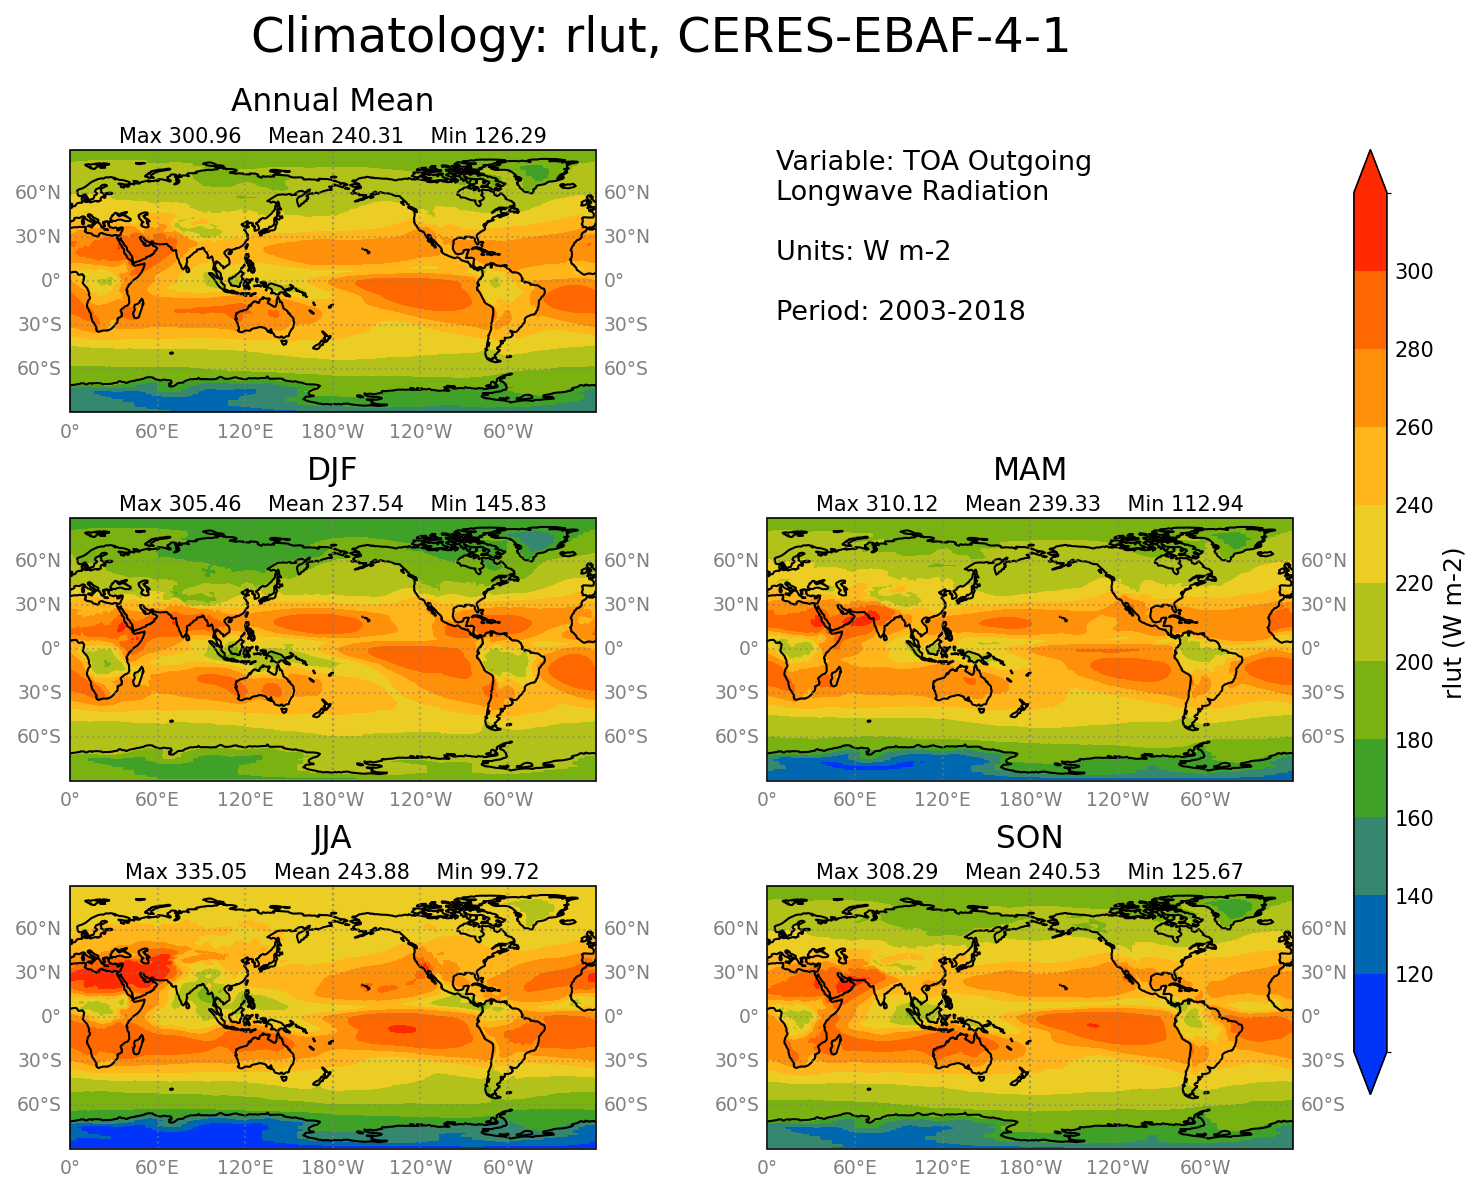

In [6]:
from datetime import datetime

today_date = datetime.today().strftime('%Y%m%d')
image_path = f"{demo_output_directory}/climo/rlut_mon_CERES-EBAF-4-1_BE_gn.200301-201812.AC.v{today_date}.png"
img = Image(image_path)
display_png(img)

## Mixing inputs and specifying the output directory

Parameters that are specified on the command line override those in the parameter file when both are provided. In this case the output directory and file name are specified separately on the command line using the variables `outpath` and `outfilename`. This functionality is usefuly for creating batch climatologies scripts.

In [7]:
!pcmdi_compute_climatologies.py \
-p basic_annual_cycle_param.py \
--outpath {demo_output_directory}/climo/ \
--outfilename rlut_mon_CERES-EBAF-4-1_BE_gn.nc \

start and end are  2003-01   2018-12
variable list:  ['rlut']
ver: v20250909
var: rlut
infile: demo_data_tmp/obs4MIPs_PCMDI_monthly/NASA-LaRC/CERES-EBAF-4-1/mon/rlut/gn/v20210727/rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
outfile: demo_output_tmp/climo/rlut_mon_CERES-EBAF-4-1_BE_gn.nc
outfilename: rlut_mon_CERES-EBAF-4-1_BE_gn.nc
outpath: demo_output_tmp/climo/
ver: v20250909
infilename: rlut_mon_CERES-EBAF-4-1_PCMDI_gn_200301-201812.nc
type(d): <class 'xarray.core.dataset.Dataset'>
atts: {'Conventions': 'CF-1.7 ODS-2.1', 'activity_id': 'obs4MIPs', 'contact': 'PCMDI (pcmdi-metrics@llnl.gov)', 'creation_date': '2021-07-27T18:20:26Z', 'curation_provenance': 'work-in-progress', 'data_specs_version': '2.1.0', 'external_variables': 'areacella', 'frequency': 'mon', 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.NASA-LaRC.CERES-EBAF-4-1.experiment_idsub_experiment_idPCMDI', 'grid': '1x1 degree latitude x longitude', 'grid_label': 'gn', 'history': '2021-07-27T18:20:26Z; CMOR 